## Import and understand the data. 

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

ModuleNotFoundError: No module named 'google'

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import ‘signal-data.csv’ as DataFrame.
df = pd.read_csv('/content/drive/My Drive/Data/signal-data.csv')
#5 observations
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [ ]:
#summary 
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


### data cleansing

In [ ]:
#Remove all the features with 20%+ Null values and impute rest with mean of the feature.
for col in df.columns[1:]:
  count_nan = df[col].isna().sum()
  if count_nan > 30:
    print ('for column '+col+ ' Count of NaNs: ' + str(count_nan))
    df = df.drop(col,axis=1)
  else:
    m = np.mean([i for i in df[col]])
    df[col] =df[col].fillna(m)
    df[col] =df[col].replace(x,m)

df.head(1)

for column 72 Count of NaNs: 794
for column 73 Count of NaNs: 794
for column 85 Count of NaNs: 1341
for column 89 Count of NaNs: 51
for column 90 Count of NaNs: 51
for column 109 Count of NaNs: 1018
for column 110 Count of NaNs: 1018
for column 111 Count of NaNs: 1018
for column 112 Count of NaNs: 715
for column 157 Count of NaNs: 1429
for column 158 Count of NaNs: 1429
for column 220 Count of NaNs: 1341
for column 224 Count of NaNs: 51
for column 225 Count of NaNs: 51
for column 244 Count of NaNs: 1018
for column 245 Count of NaNs: 1018
for column 246 Count of NaNs: 1018
for column 247 Count of NaNs: 715
for column 292 Count of NaNs: 1429
for column 293 Count of NaNs: 1429
for column 345 Count of NaNs: 794
for column 346 Count of NaNs: 794
for column 358 Count of NaNs: 1341
for column 362 Count of NaNs: 51
for column 363 Count of NaNs: 51
for column 382 Count of NaNs: 1018
for column 383 Count of NaNs: 1018
for column 384 Count of NaNs: 1018
for column 385 Count of NaNs: 715
for colum

,Time,0,1,2,3,4,5,6,7,8,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.0,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,14.9509,0.5005,0.0118,0.0035,2.363,NaN,NaN,NaN,NaN,-1


In [ ]:
#Identify and drop the features which are having same value for all the rows

for i in df.columns[:-1]:
  if len(df[i].unique()) <3:
    print('column no. ',i)
    print()
    print('length of unique. ',len(df[i].unique()))
    print()
    print('unique elements ; ',df[i].unique())
    df = df.drop(i,axis=1)
#remove col with mean nan
df = df.dropna()

column no.  5

length of unique.  2

unique elements ;  [100.  nan]
column no.  13

length of unique.  2

unique elements ;  [ 0. nan]
column no.  42

length of unique.  2

unique elements ;  [70. nan]
column no.  49

length of unique.  2

unique elements ;  [ 1. nan]
column no.  52

length of unique.  2

unique elements ;  [ 0. nan]
column no.  69

length of unique.  2

unique elements ;  [ 1. nan]
column no.  97

length of unique.  2

unique elements ;  [ 0. nan]
column no.  141

length of unique.  2

unique elements ;  [ 0. nan]
column no.  149

length of unique.  2

unique elements ;  [ 0. nan]
column no.  178

length of unique.  2

unique elements ;  [ 0. nan]
column no.  179

length of unique.  2

unique elements ;  [ 0. nan]
column no.  186

length of unique.  2

unique elements ;  [ 0. nan]
column no.  189

length of unique.  2

unique elements ;  [ 0. nan]
column no.  190

length of unique.  2

unique elements ;  [ 0. nan]
column no.  191

length of unique.  2

unique elements

In [ ]:
#Check for multi-collinearity in the data and take necessary action. 
df.corr()

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.149186,-0.004106,-0.006650,-0.010115,-0.005057,0.004657,-0.060767,0.008004,0.011088,...,-0.005970,-0.001022,0.026518,0.022224,0.026558,0.025056,-0.027657,-0.031184,0.001544,-0.017225
1,-0.149186,1.000000,0.013037,-0.008283,0.001387,-0.023159,0.003881,0.030545,0.020371,0.004230,...,-0.019739,0.046902,-0.000668,-0.003591,-0.001172,-0.005778,0.010687,0.003504,0.042440,-0.005298
2,-0.004106,0.013037,1.000000,0.307460,0.118308,-0.146282,-0.268891,0.024966,0.025928,0.068095,...,-0.020680,-0.017147,0.019015,0.021387,0.019016,-0.025434,-0.027913,-0.028666,-0.036622,0.005037
3,-0.006650,-0.008283,0.307460,1.000000,-0.067838,-0.680669,0.140495,-0.100720,0.085735,0.054633,...,0.021767,0.000400,0.029086,0.027660,0.029665,0.038652,-0.035404,-0.027130,-0.088363,-0.018894
4,-0.010115,0.001387,0.118308,-0.067838,1.000000,-0.018277,-0.924337,-0.039498,0.076151,0.002123,...,-0.005440,0.028863,-0.004291,-0.005345,-0.004322,-0.031382,-0.015609,-0.010177,0.075998,-0.010414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.025056,-0.005778,-0.025434,0.038652,-0.031382,-0.050806,0.049324,0.008976,0.033842,0.010701,...,0.003866,-0.019000,0.001869,0.001325,0.002370,1.000000,0.173026,0.169574,-0.481458,-0.008620
587,-0.027657,0.010687,-0.027913,-0.035404,-0.015609,0.022308,0.004146,0.024412,0.069918,0.041410,...,-0.003814,-0.025882,-0.005444,-0.004452,-0.005665,0.173026,1.000000,0.974683,0.387541,0.025041
588,-0.031184,0.003504,-0.028666,-0.027130,-0.010177,0.018339,-0.001492,0.028125,0.071232,0.041474,...,-0.010557,-0.021487,-0.004852,-0.003873,-0.005070,0.169574,0.974683,1.000000,0.384931,0.023700
589,0.001544,0.042440,-0.036622,-0.088363,0.075998,0.046105,-0.091154,-0.022504,0.014205,-0.011342,...,-0.027079,0.053441,-0.004801,-0.005419,-0.005610,-0.481458,0.387541,0.384931,1.000000,-0.000561


In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Data analysis & visualisation
 


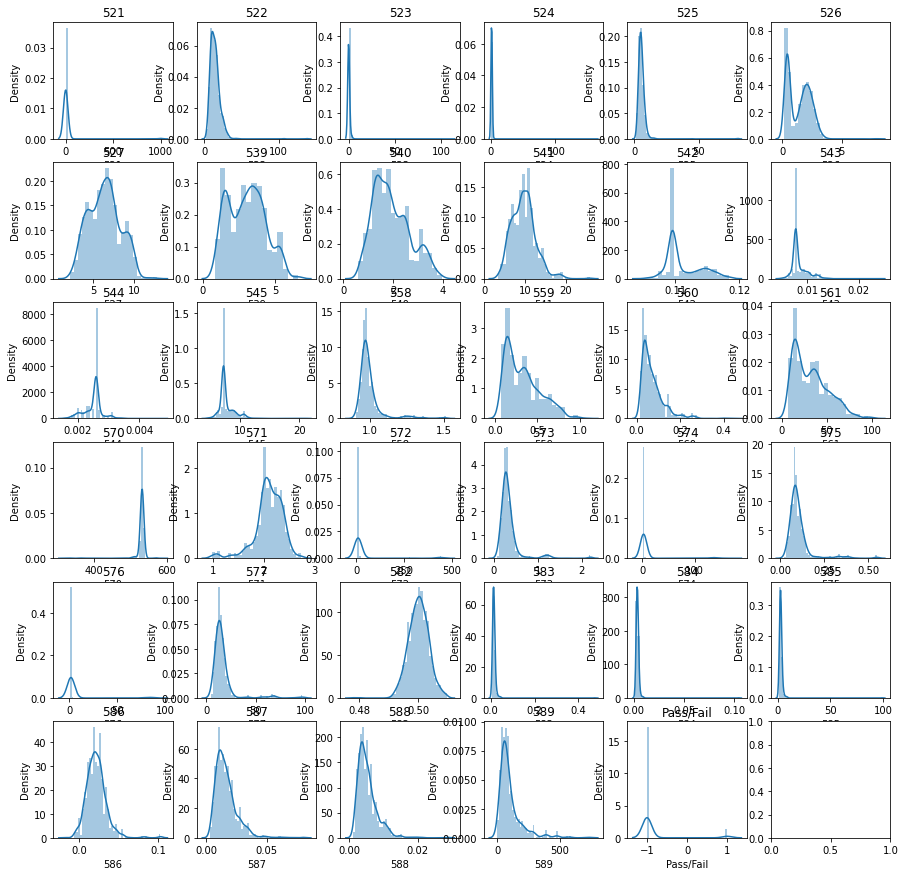

In [ ]:
#Perform a univariate Analysis 
fig, axes = plt.subplots(nrows = 6, ncols = 6)    
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, df.columns[-35:]):
  sns.distplot(df[col], ax = ax)
  ax.set_title(col)

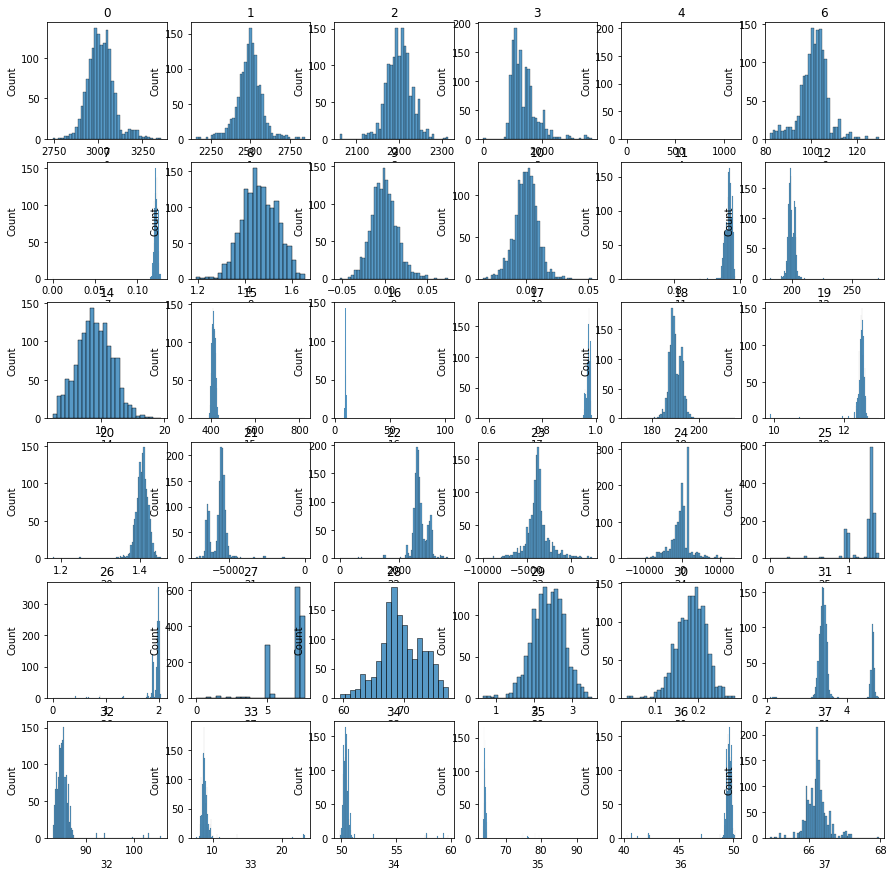

In [ ]:
fig, axes = plt.subplots(nrows = 6, ncols = 6)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(15, 15)

for ax, col in zip(axes, df.columns[1:37]):
  sns.histplot(df[col], ax = ax)
  ax.set_title(col)

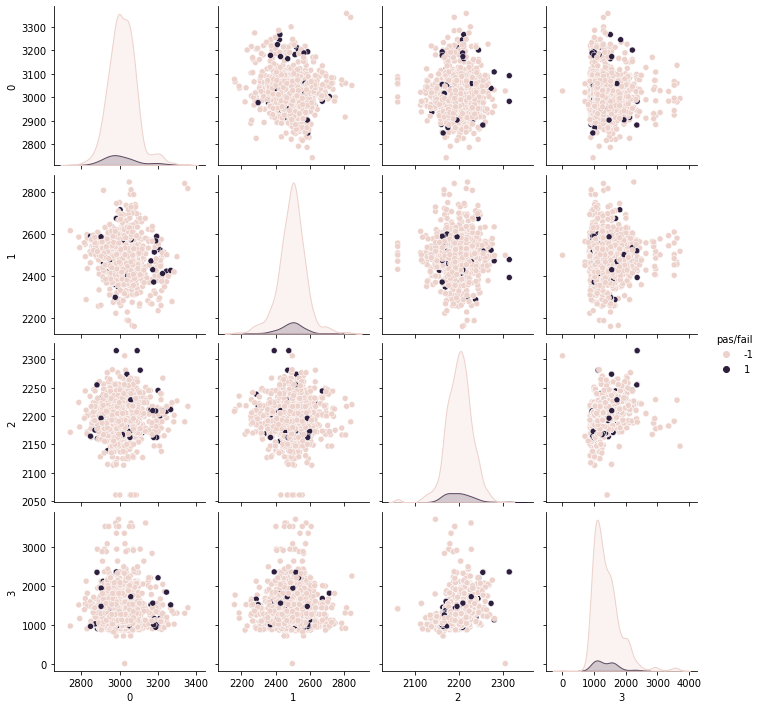

In [ ]:
#Perform bivariate and multivariate analysis
trim = df.iloc[:,:5]
trim['pas/fail'] = [o for o in df['Pass/Fail']]
sns.pairplot( trim,hue='pas/fail')

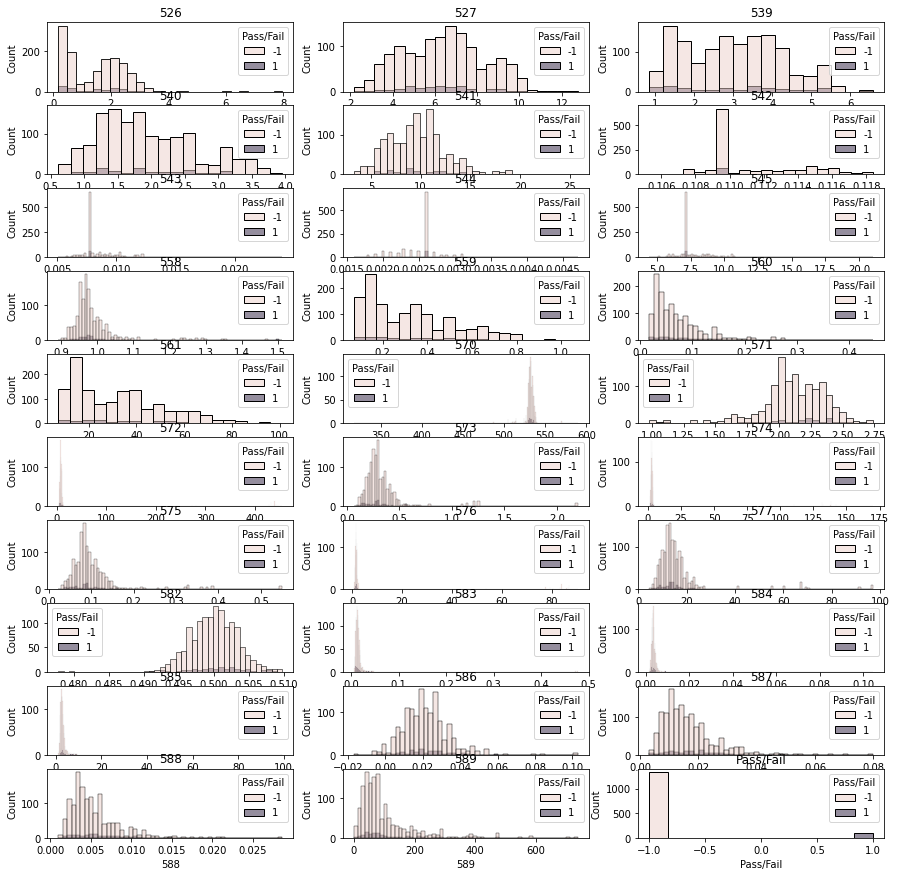

In [ ]:
fig, axes = plt.subplots(nrows = 10, ncols = 3)   
axes = axes.flatten()         
fig.set_size_inches(15, 15)

trim = df.iloc[:,5:15]
trim['Pass/Fail'] = [o for o in df['Pass/Fail']]

for ax, col in zip(axes, df.columns[-30:]):
  sns.histplot(data = df,x=col, ax= ax, hue='Pass/Fail')
  ax.set_title(col)


### Data pre-processing

In [ ]:
#Segregate predictors vs target attributes. [2 Marks] 
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

X.shape,y.shape

((1436, 414), (1436,))

In [ ]:
df.head()

,Time,0,1,2,3,4,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
5,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5287,0.0167,...,13.7755,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,-1


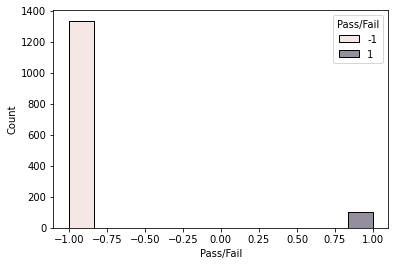

In [ ]:
#Check for target balancing and fix it if found imbalanced
sns.histplot(data = df,x='Pass/Fail', hue='Pass/Fail')

In [ ]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_res.shape,y_res.shape

((2672, 414), (2672,))

In [ ]:
#Perform train-test split and standardise the data
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X_res,y_res,test_size=0.2)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(2137, 414)
(535, 414)
(2137,)
(535,)


Model training, testing and tuning: [20 Marks] 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



#Use any Supervised Learning technique to train a model
logreg = LogisticRegression(max_iter=100)


c_space = np.logspace(-5, 8, 15)
param_grid = {'C':c_space}

#Use cross validation techniques
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_res,y_res)

#Apply hyper-parameter tuning techniques to get the best accuracy
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.6497336273583254


In [ ]:
#Enhance the model performance
from sklearn.decomposition import PCA

#pca = PCA(n_components=5)
#pca did not help
logreg = LogisticRegression(max_iter=1000)
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_res,y_res)

#hyper-parameter tuning techniques to get the best accuracy
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.7725282649025168


In [ ]:
#classification report

from sklearn.metrics import classification_report


p = logreg_cv.predict(xtest)
pc = p>np.mean(p)
yt = ytest > 0




ptrain = logreg_cv.predict(xtrain)
ptrain = ptrain>np.mean(ptrain)
yptrain = ytrain > 0


print(classification_report(yt,pc))
print('-'*50)
print('train - test - metric')
print('-'*50)
print(classification_report(ptrain,yptrain))

              precision    recall  f1-score   support

       False       0.86      0.85      0.85       240
        True       0.88      0.88      0.88       295

    accuracy                           0.87       535
   macro avg       0.87      0.87      0.87       535
weighted avg       0.87      0.87      0.87       535

--------------------------------------------------
train - test - metric
--------------------------------------------------
              precision    recall  f1-score   support

       False       0.81      0.88      0.84      1017
        True       0.88      0.82      0.85      1120

    accuracy                           0.85      2137
   macro avg       0.85      0.85      0.85      2137
weighted avg       0.85      0.85      0.85      2137



In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(random_state=0)
dtr.fit(xtrain,ytrain)
pred = dtr.predict(xtest)
predt = dtr.predict(xtrain)

print(classification_report(ytest,pred))
print('-'*50)
print('train - test - metric')
print('-'*50)
print(classification_report(ytrain,predt))

              precision    recall  f1-score   support

          -1       0.91      0.88      0.90       240
           1       0.91      0.93      0.92       295

    accuracy                           0.91       535
   macro avg       0.91      0.91      0.91       535
weighted avg       0.91      0.91      0.91       535

--------------------------------------------------
train - test - metric
--------------------------------------------------
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1096
           1       1.00      1.00      1.00      1041

    accuracy                           1.00      2137
   macro avg       1.00      1.00      1.00      2137
weighted avg       1.00      1.00      1.00      2137



In [ ]:
#Display and compare all the models designed with their train and test accuracies

print('decision tree performed better with accuracy of 91%')

print('decision tree')
print(classification_report(yt,pc))
print('-'*50)
print('train - test - metric')
print('-'*50)
print(classification_report(ptrain,yptrain))

#Pickle the selected model for future use
# save
import pickle
with open('decisionTree.pkl','wb') as f:
    pickle.dump(dtr,f)


decision tree performed better with accuracy of 91%
decision tree
              precision    recall  f1-score   support

       False       0.86      0.85      0.85       240
        True       0.88      0.88      0.88       295

    accuracy                           0.87       535
   macro avg       0.87      0.87      0.87       535
weighted avg       0.87      0.87      0.87       535

--------------------------------------------------
train - test - metric
--------------------------------------------------
              precision    recall  f1-score   support

       False       0.81      0.88      0.84      1017
        True       0.88      0.82      0.85      1120

    accuracy                           0.85      2137
   macro avg       0.85      0.85      0.85      2137
weighted avg       0.85      0.85      0.85      2137

